**Assignment 6**

**Image and Video Analytics**

**Vishali Sharma**

**21MIA1066**

Task 2: Strategic Marketing – Peak Shopping Duration

Objective:
Analyze a video of a shopping area to identify the peak duration when the most people are shopping.

**Task Description:**

**Load Video:**

**Load the surveillance video from a shopping area.**

**People Detection:**

**Use frame differencing or optical flow to detect motion and identify people entering the frame.**

**Count the number of people in each frame based on detected regions.**

**Peak Duration Identification:**

**Calculate the total number of people in the shopping area for each time period (e.g., 10-minute intervals).**
                                                           
**Plot the number of people over time and identify the time interval with the highest count of people.**

**Result:**

**Provide a summary of the peak shopping duration and display the corresponding frames from the video.**

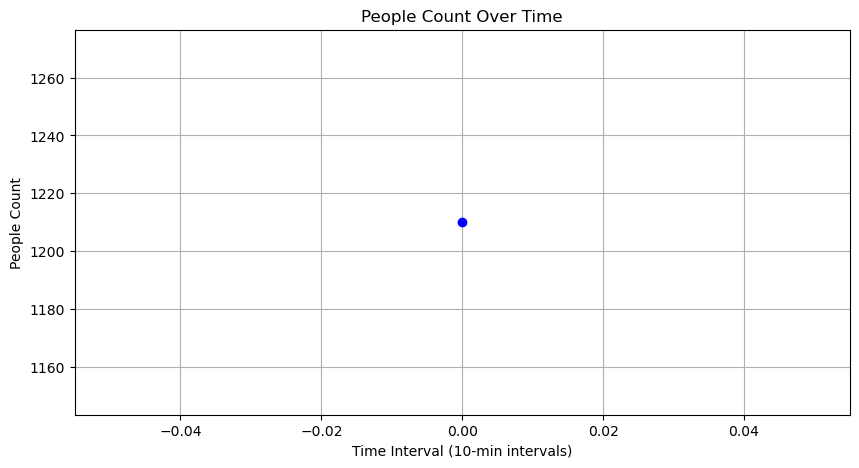

The peak shopping duration is at interval 0 with 1210 people.


In [1]:
#pip install opencv-python matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the video file
video_path = "task_2.mp4"
cap = cv2.VideoCapture(video_path)

# Initialize background subtractor
back_sub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50, detectShadows=True)

# Variables to track people count
frame_rate = cap.get(cv2.CAP_PROP_FPS)
interval_duration = 10 * 60  # 10 minutes in seconds
frames_per_interval = int(interval_duration * frame_rate)

people_counts = defaultdict(int)  # Stores counts for each interval
interval_index = 0
frame_count = 0

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction
    fg_mask = back_sub.apply(frame)
    
    # Threshold to binary
    _, fg_mask = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)
    
    # Find contours of moving objects
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    people_in_frame = 0

    for cnt in contours:
        if cv2.contourArea(cnt) < 1000:  # Ignore small contours
            continue

        # Get bounding box around the person
        x, y, w, h = cv2.boundingRect(cnt)
        people_in_frame += 1

        # Draw bounding box
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Count people in current interval
    people_counts[interval_index] += people_in_frame

    # Show frame with bounding boxes
    cv2.imshow("People Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Move to the next interval if necessary
    frame_count += 1
    if frame_count >= frames_per_interval:
        interval_index += 1
        frame_count = 0

cap.release()
cv2.destroyAllWindows()

# Plot people counts over time intervals
intervals = list(people_counts.keys())
counts = list(people_counts.values())

plt.figure(figsize=(10, 5))
plt.plot(intervals, counts, marker='o', color='b')
plt.title("People Count Over Time")
plt.xlabel("Time Interval (10-min intervals)")
plt.ylabel("People Count")
plt.grid(True)
plt.show()

# Find peak interval
peak_interval = max(people_counts, key=people_counts.get)
print(f"The peak shopping duration is at interval {peak_interval} with {people_counts[peak_interval]} people.")